<a href="https://colab.research.google.com/github/Code83/API-HUG/blob/master/Keras_model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic=pd.read_csv('https://raw.githubusercontent.com/sightes/COFFETALKS/main/Titanic.csv',sep=',')



In [ ]:
from sklearn.model_selection import train_test_split
X=titanic.drop("Survived",axis=1)
y=titanic.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)



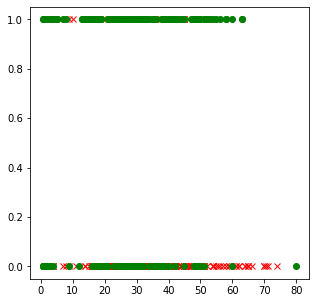

In [ ]:
#mapa de dispersion
fig=plt.figure(figsize=(5,5))
plt.plot(X_train['Age'].iloc[np.where(y_train==0)],
         X_train['Sex'].iloc[np.where(y_train==0)],'rx')

plt.plot(X_train['Age'].iloc[np.where(y_train==1)],
         X_train['Sex'].iloc[np.where(y_train==1)],'go')

In [ ]:
#Alternativa 3
from keras.models import Model, Input
#from keras.models import Input
#import numpy as np
from keras.layers.core import Dense, Activation, Dropout

def ini_pesos(shape,dtype=None):
  return np.random.normal(loc=0.75, scale=1e-2, size=shape)

I=Input(shape=(5,))
L1=Dense(4,activation='sigmoid', kernel_initializer=ini_pesos)(I)
L2=Dense(2,activation='sigmoid', kernel_initializer=ini_pesos)(L1)

S=Dense(1,activation='sigmoid')(L2)

modelo=Model(inputs=I,outputs=S)

modelo.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
modelo.fit(X_train,y_train,epochs=5000,verbose=0,use_multiprocessing=True)
y_pred=modelo.predict(X_test)

In [ ]:
y_pred=1*(y_pred>0.5)
y_pred=np.transpose(y_pred)[0]

In [ ]:
a=((y_test.values)*2)-y_pred
VN=np.sum(1*[a==0])
VP=np.sum(1*[a==2])
FN=np.sum(1*[a==1])
FP=np.sum(1*[a==-1])

In [ ]:
ACC=(VN+VP)/(VN+VP+FN+FP)
ACC

0.6976744186046512